In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_excel("Sample Data.xlsx")

In [4]:
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,2016-04-08,141604.0,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,1997-11-29,99975.0,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50.0,2006-10-26,163099.0,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,2019-09-27,84913.0,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55.0,1995-11-20,95409.0,0.00,United States,Phoenix,NaT


In [5]:
df.describe()

,Age,Hire Date,Annual Salary,Bonus %,Exit Date
count,994.000000,993,989.00000,992.000000,85
mean,44.369215,2012-04-17 22:56:11.601208576,113372.62184,0.088972,2016-11-02 18:04:14.117647104
min,25.000000,1992-01-09 00:00:00,40063.00000,0.000000,1994-12-18 00:00:00
25%,35.000000,2007-02-24 00:00:00,71234.00000,0.000000,2014-12-25 00:00:00
50%,45.000000,2014-02-20 00:00:00,96567.00000,0.000000,2019-05-23 00:00:00
75%,54.000000,2018-06-25 00:00:00,151027.00000,0.150000,2021-04-09 00:00:00
max,65.000000,2021-12-26 00:00:00,258498.00000,0.400000,2022-08-17 00:00:00
std,11.248162,NaN,53729.04678,0.118135,NaN


# Clean the data.

In [6]:
df.duplicated().sum()  

0

In [7]:
df.isna().sum()

EEID               0
Full Name          2
Job Title          1
Department         2
Business Unit      0
Gender             1
Ethnicity          7
Age                6
Hire Date          7
Annual Salary     11
Bonus %            8
Country            2
City               2
Exit Date        915
dtype: int64

In [8]:
categorical_columns = ["Full Name", "Job Title",
                       "Department", "Gender", "Country", "City", "Ethnicity"]
df[categorical_columns] = df[categorical_columns].fillna("Not Provided")

In [9]:
df['Annual Salary'] = df['Annual Salary'].fillna(df['Annual Salary'].mean())
df['Age'] = df['Age'].fillna(int(df['Age'].mean()))
df['Bonus %'] = df['Bonus %'].fillna(0.0)

In [10]:
df['Hire Date'] = df['Hire Date'].fillna(df['Hire Date'].mode()[0])
df['Exit Date'] = df['Exit Date'].fillna('Not Provided')

In [11]:
df['EEID'] = df['EEID'].astype(str)
df['Annual Salary'] = pd.to_numeric(df['Annual Salary'], errors='coerce')
df['Bonus %'] = pd.to_numeric(df['Bonus %'], errors='coerce')

In [12]:
print("missing values after cleaning:")
print(df.isna().sum())

missing values after cleaning:
EEID             0
Full Name        0
Job Title        0
Department       0
Business Unit    0
Gender           0
Ethnicity        0
Age              0
Hire Date        0
Annual Salary    0
Bonus %          0
Country          0
City             0
Exit Date        0
dtype: int64


Ensure that all data is in the correct format .

In [13]:
df['EEID'] = df['EEID'].astype(str)
df['Annual Salary'] = pd.to_numeric(df['Annual Salary'], errors='coerce')
df['Bonus %'] = pd.to_numeric(df['Bonus %'], errors='coerce')


df['Hire Date'] = pd.to_datetime(df['Hire Date'], errors='coerce')
df['Exit Date'] = pd.to_datetime(df['Exit Date'], errors='coerce')

In [14]:
df.tail()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
995,E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33.0,2016-09-18,98427.0,0.00,United States,Columbus,NaT
996,E01909,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44.0,2010-05-31,47387.0,0.00,China,Chengdu,2018-01-08
997,E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31.0,2019-06-10,176710.0,0.15,United States,Miami,NaT
998,E02521,Lily Nguyen,Sr. Analyst,Finance,Speciality Products,Female,Asian,33.0,2012-01-28,95960.0,0.00,China,Chengdu,NaT
999,E03545,Sofia Cheng,Vice President,Accounting,Corporate,Female,Asian,63.0,2020-07-26,216195.0,0.31,United States,Miami,NaT


# Change the first 5 rows (input any values)

In [15]:
modified_rows = [
    [1, "John Doe", "Software Engineer", "IT", "Corporate", "Male", "Hispanic",
        30, "1/1/2020", 80000, 0.5, "United States", "New York", np.nan],
    [2, "Jane Smith", "Data Scientist", "Finance", "Corporate", "Female", "Caucasian",
        28, "2/2/2020", 95000, 0.1, "United States", "San Francisco", np.nan],
    [3, "Alice Johnson", "Product Manager", "Sales", "Corporate", "Female",
        "Black", 35, "3/3/2020", 105000, 0.12, "United States", "Chicago", np.nan],
    [4, "Bob Brown", "HR Specialist", "HR", "Corporate", "Male", "Asian",
        45, "4/4/2020", 70000, 0.8, "United States", "Seattle", np.nan],
    [5, "Charlie Davis", "Marketing Manager", "Marketing", "Corporate", "Male",
        "Caucasian", 38, "5/5/2020", 85000, 0.15, "United States", "Los Angeles", np.nan]
]


df.iloc[:5] = pd.DataFrame(modified_rows, columns=df.columns)

df.head()

NameError: name 'np' is not defined

In [16]:
max_salary_row = df.loc[df['Annual Salary'].idxmax()]
print("Row with the Largest Salary:")
print(max_salary_row)

Row with the Largest Salary:
EEID                          E04354
Full Name               Raelynn Rios
Job Title             Vice President
Department                     Sales
Business Unit          Manufacturing
Gender                        Female
Ethnicity                     Latino
Age                             43.0
Hire Date        2016-08-21 00:00:00
Annual Salary               258498.0
Bonus %                         0.35
Country                United States
City                        Columbus
Exit Date                        NaT
Name: 989, dtype: object


In [17]:
df

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,2016-04-08,141604.0,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,1997-11-29,99975.0,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50.0,2006-10-26,163099.0,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,2019-09-27,84913.0,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55.0,1995-11-20,95409.0,0.00,United States,Phoenix,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33.0,2016-09-18,98427.0,0.00,United States,Columbus,NaT
996,E01909,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44.0,2010-05-31,47387.0,0.00,China,Chengdu,2018-01-08
997,E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31.0,2019-06-10,176710.0,0.15,United States,Miami,NaT
998,E02521,Lily Nguyen,Sr. Analyst,Finance,Speciality Products,Female,Asian,33.0,2012-01-28,95960.0,0.00,China,Chengdu,NaT


Export to CSV then to Excel to ensure that the date is in the correct format (or the date will be in excel format)

In [18]:
output_file_path = 'Modified Sample Data.csv'
df.to_csv(output_file_path, index=False)

In [19]:
modified_df = pd.read_csv(output_file_path)

In [20]:
modified_df.to_excel('Modified Sample Data.xlsx', index=False)

# Distribution of Anuual salaries

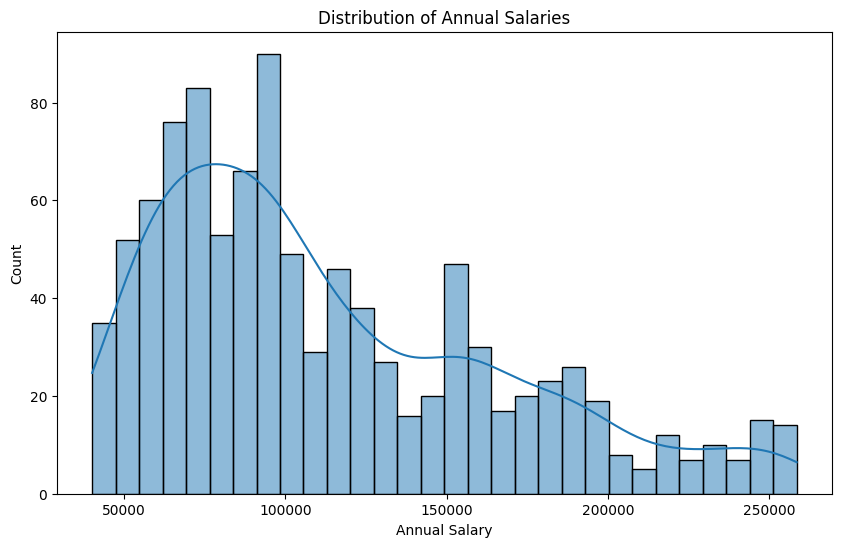

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Salary'], bins=30, kde=True)
plt.title('Distribution of Annual Salaries')
plt.xlabel('Annual Salary')
plt.show()

# Distribution of Gender by departments

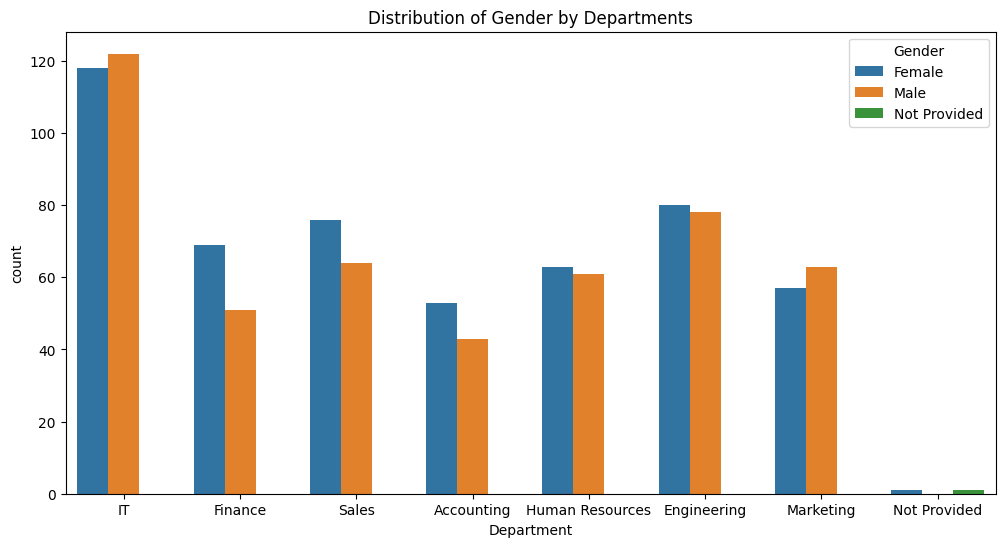

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df , x='Department' , hue='Gender')
plt.title('Distribution of Gender by Departments')
plt.show()

# Avarage salary by department

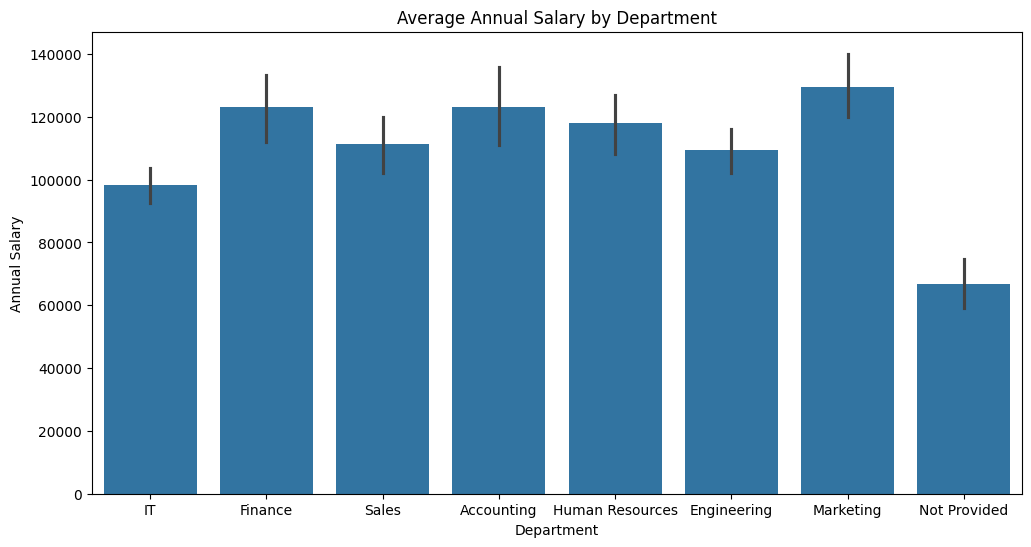

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df , x='Department' , y='Annual Salary' , estimator=np.mean)
plt.xlabel = 'Departments'
plt.ylabel = 'Average Annual Salary'
plt.title('Average Annual Salary by Department')
plt.show()

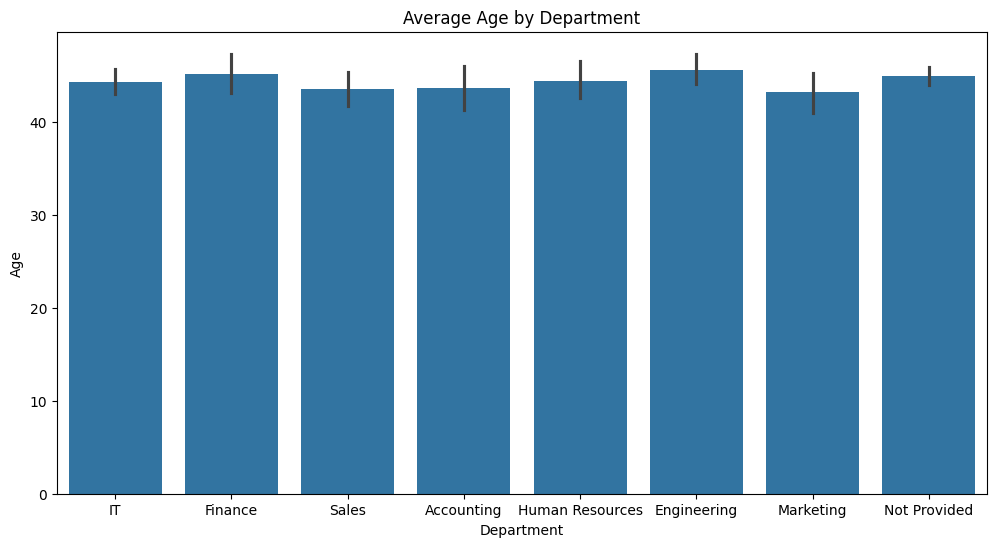

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Department', y='Age', estimator=np.mean)
plt.xlabel = 'Departments'
plt.ylabel = 'Age'
plt.title('Average Age by Department')
plt.show()

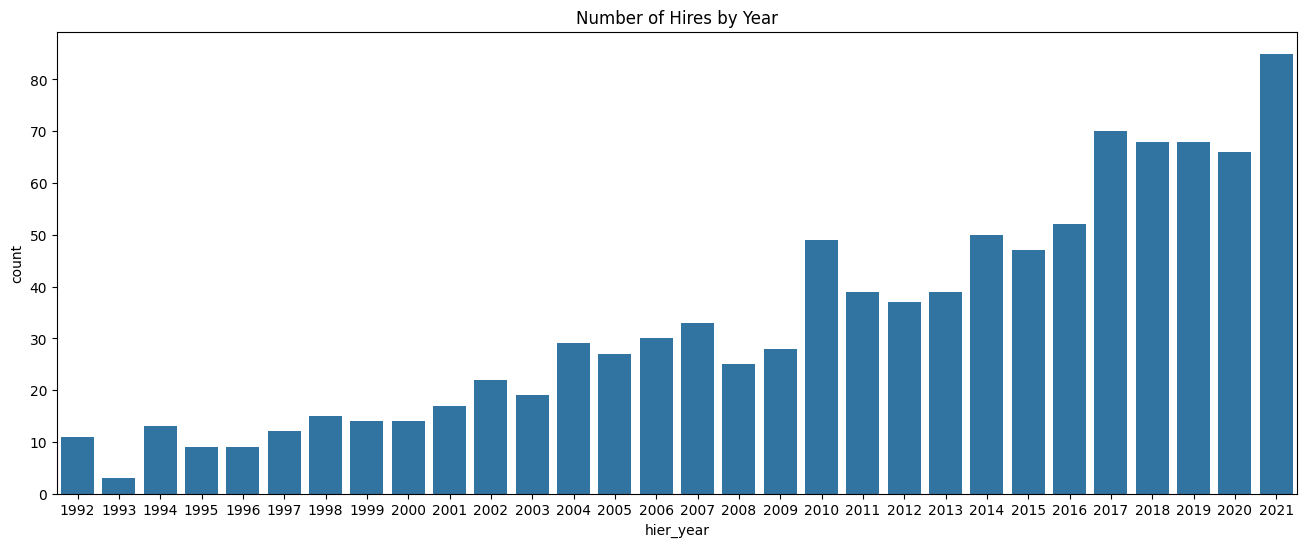

In [33]:
df['hier_year'] = df['Hire Date'].dt.year
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='hier_year')
plt.title('Number of Hires by Year')
plt.show()